Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


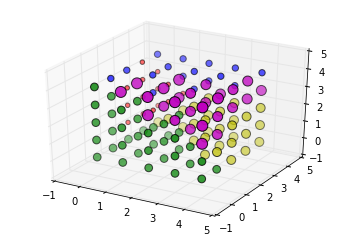

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import itertools
%pylab inline

size = 5;
im3d = np.random.rand(size, size, size);
# im3d = np.array([[[1,1,1],[1,1,1],[1,1,1]],
#         [[2,2,2],[2,2,2],[2,2,2]],
#         [[3,3,3],[3,3,3],[3,3,3]]])
from skimage import morphology
from scipy import ndimage as ndi
seeds = ndi.label(im3d < 0.1)[0]
ws = morphology.watershed(im3d, seeds)
# print ws;

X = []
Y = []
Z = []
S = []
C = []
for x, y, z in itertools.product(xrange(size), 
                                 xrange(size), 
                                 xrange(size)):
    v = ws[x][y][z];
    X.append(x);
    Y.append(y);
    Z.append(z);
    S.append(v * 20);
    if v < 2:
        C.append('r');
    elif v < 3:
        C.append('b');
    elif v < 4:
        C.append('g');
    elif v < 5:
        C.append('y');
    else:
        C.append('m');
    
# print S;

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, Z, "z", s=S, c=C)


#from skimage import segmentation
#slices = segmentation.slic(im3d, spacing=[5, 1, 1], multichannel=False)